In [1]:
import os
import sys; sys.path.append('/Users/dlchang/img_pipe/')
import img_pipe
reload(img_pipe)
from mayavi import mlab
import numpy as np
%matplotlib inline

# Img_pipe Plotting Demo

First, let's make sure we have our environment variables set. We need SUBJECTS_DIR, FREESURFER_HOME in our .bash_profile or .bashrc. __If you only care about plotting and not creating recons, you can just set FREESURFER_HOME to anything in your .bash_profile.__


In [2]:
print 'Subjects directory:', os.environ['SUBJECTS_DIR']
print 'Freesurfer home:', os.environ['FREESURFER_HOME']

Subjects directory: /Users/dlchang/dura/data_store2/imaging/subjects
Freesurfer home: /Applications/freesurfer/


#### Create a freeCoG instance, with subject name and hemisphere as arguments.

In [6]:
patient=img_pipe.freeCoG(subj='EC143',hem='lh')

### Utility functions

In [7]:
# Get electrodes for this patient
elecs = patient.get_elecs()

# Get electrodes in STG
elecs = patient.get_elecs(roi='superiortemporal')

# Get clinical electrodes in hippocampus
clin_hipp_elecs = patient.get_elecs(roi='Left-Hippocampus', 
                                    elecfile_prefix='clinical_elecs_all')

print clin_hipp_elecs['elecmatrix']
print clin_hipp_elecs['anatomy'][:,3]

[[-23.61 -10.04   0.09]
 [-26.87 -19.75   3.96]
 [-31.87 -19.47   3.44]]
[array([u'Left-Hippocampus'], 
      dtype='<U16')
 array([u'Left-Hippocampus'], 
      dtype='<U16')
 array([u'Left-Hippocampus'], 
      dtype='<U16')]


### plot_brain( )

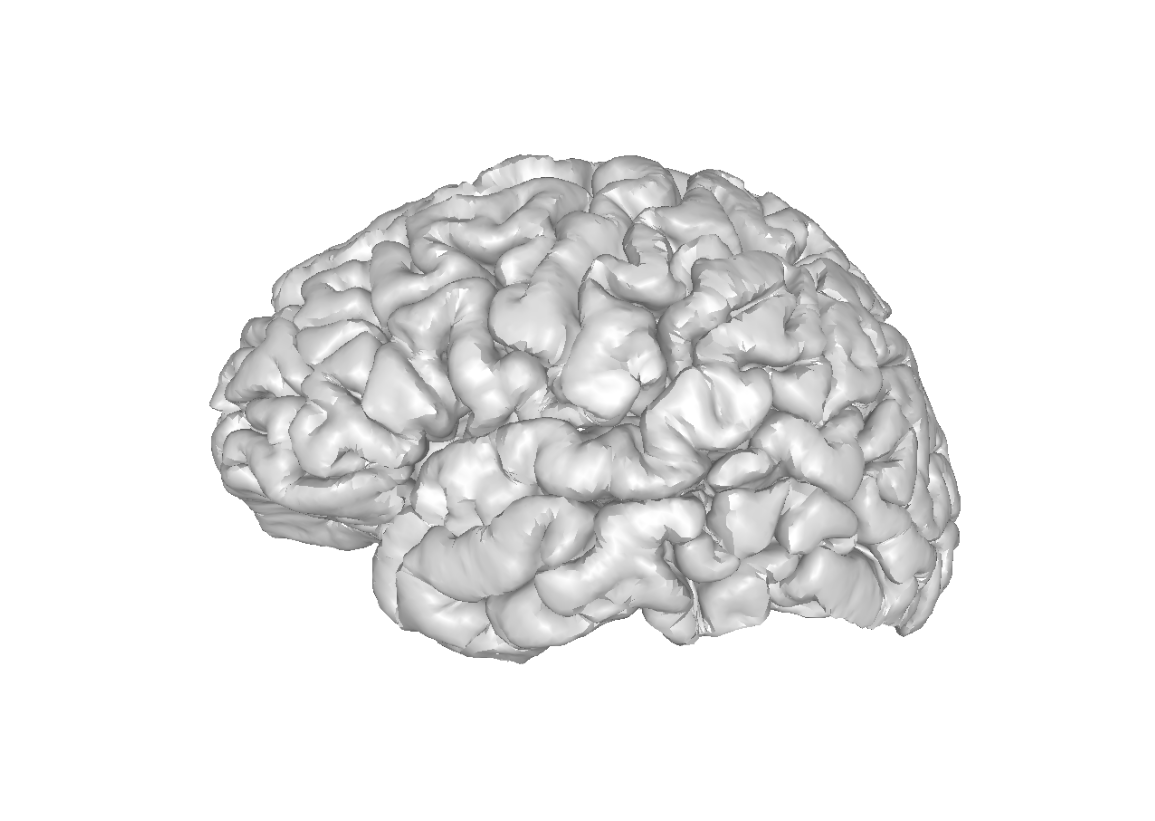

(<mayavi.modules.surface.Surface at 0x119d3cd10>,
 None,
 <module 'mayavi.mlab' from '/Users/dlchang/anaconda2/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

In [8]:
patient.plot_brain(showfig=False)

__To plot different regions of the brain, create a patient.roi object.__

In [ ]:
pial = patient.roi('pial',opacity=0.5, representation='surface',color=(0.9,0.8,0.5),gaussian=False)
hipp = patient.roi('lHipp', opacity = 0.8, representation = 'wireframe', color=(0.5, 0.3, 0.5), gaussian=False)

In [10]:
patient.plot_brain(rois=[pial, hipp])

(<mayavi.modules.surface.Surface at 0x13233b710>,
 None,
 <module 'mayavi.mlab' from '/Users/dlchang/anaconda2/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

#### Can also plot elecs and weights

In [23]:
#non-gaussian
elecmatrix = patient.get_elecs(roi='superiortemporal')['elecmatrix']
patient.plot_brain(rois=[pial,hipp],
                  elecs=elecmatrix,
                  weights=np.random.uniform(0,1,(elecmatrix.shape[0],)))

(66,)


(<mayavi.modules.surface.Surface at 0x13a85c230>,
 <module 'mayavi.mlab' from '/Users/dlchang/anaconda2/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

In [24]:
#gaussian
elecmatrix = patient.get_elecs(roi='Left-Hippocampus')['elecmatrix']
hipp.gaussian = True
patient.plot_brain(rois=[pial,hipp],
                  elecs=elecmatrix,
                  weights=np.random.uniform(0,1,(elecmatrix.shape[0],)))

(<mayavi.modules.surface.Surface at 0x1370931d0>,
 None,
 <module 'mayavi.mlab' from '/Users/dlchang/anaconda2/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

#### This function plots the electrodes on the subject's brain, colored by anatomical region. You can pass in arguments to specify which file (TDT_elecs_all or clinical_elecs_all) to use, whether you want a screenshot or interactive window, and opacity.

ctx-lh-caudalmiddlefrontal
ctx-lh-entorhinal
ctx-lh-fusiform
ctx-lh-inferiortemporal
ctx-lh-lateralorbitofrontal
ctx-lh-medialorbitofrontal
ctx-lh-middletemporal
ctx-lh-parahippocampal
ctx-lh-parsopercularis
ctx-lh-parsorbitalis
ctx-lh-parstriangularis
ctx-lh-postcentral
ctx-lh-precentral
ctx-lh-rostralmiddlefrontal
ctx-lh-superiortemporal
ctx-lh-supramarginal
ctx-lh-temporalpole


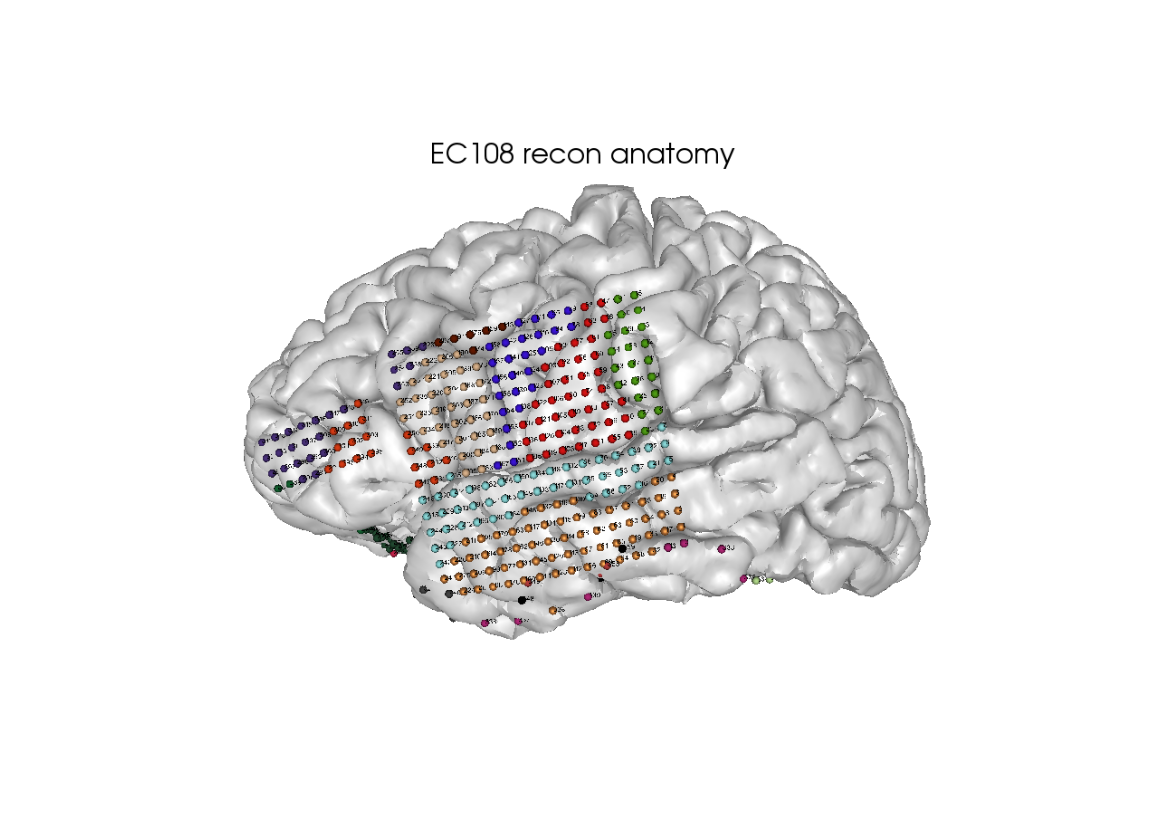

(<mayavi.modules.surface.Surface at 0x12d31f170>,
 <module 'mayavi.mlab' from '/Users/dlchang/anaconda2/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

In [6]:
patient.plot_recon_anatomy(interactive=True,screenshot=True)

ctx-lh-entorhinal
ctx-lh-fusiform
ctx-lh-inferiortemporal
ctx-lh-lateralorbitofrontal
ctx-lh-medialorbitofrontal
ctx-lh-middletemporal
ctx-lh-parahippocampal
ctx-lh-parsopercularis
ctx-lh-parsorbitalis
ctx-lh-parstriangularis
ctx-lh-postcentral
ctx-lh-precentral
ctx-lh-rostralmiddlefrontal
ctx-lh-superiortemporal
ctx-lh-supramarginal
ctx-lh-temporalpole


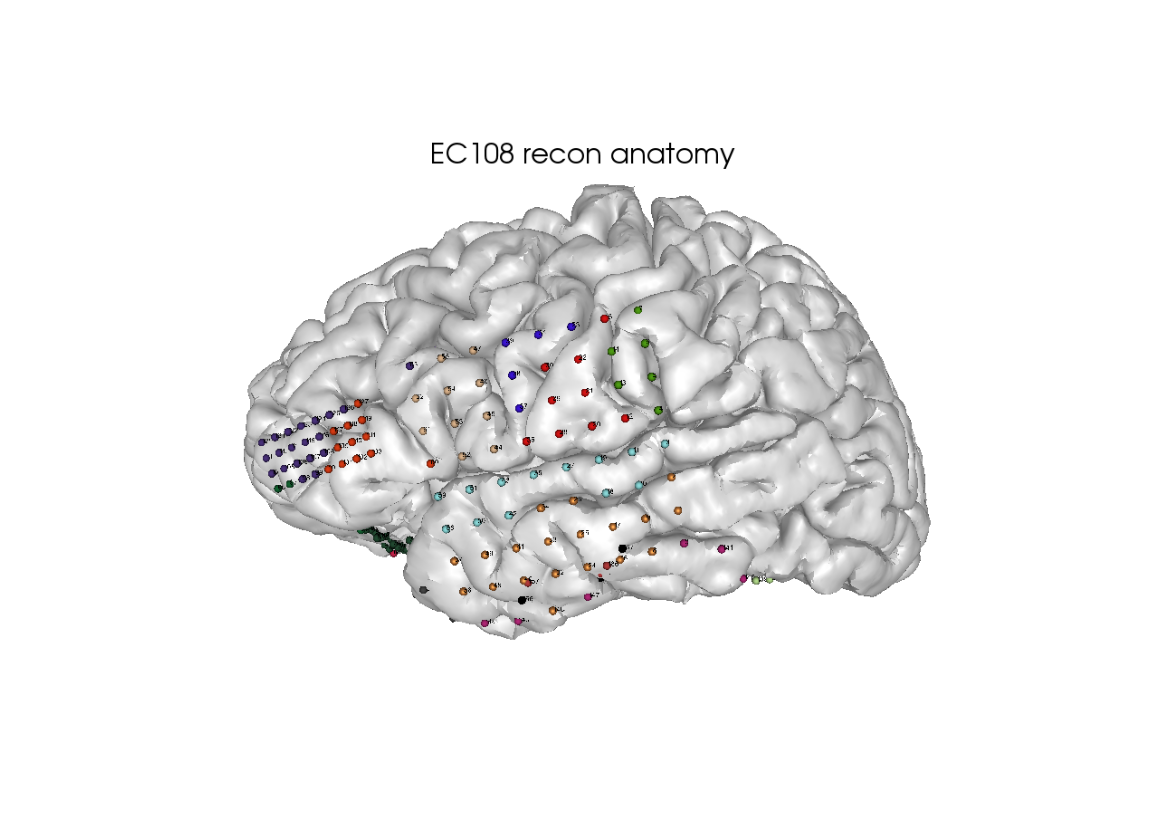

(<mayavi.modules.surface.Surface at 0x13b776530>,
 <module 'mayavi.mlab' from '/Users/dlchang/anaconda2/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

In [10]:
patient.plot_recon_anatomy(elecfile_prefix='clinical_elecs_all',
                          interactive=False,
                          screenshot=True)

#### Plotting warped electrodes on the cvs brain

ctx-lh-caudalmiddlefrontal
ctx-lh-entorhinal
ctx-lh-fusiform
ctx-lh-inferiortemporal
ctx-lh-lateralorbitofrontal
ctx-lh-medialorbitofrontal
ctx-lh-middletemporal
ctx-lh-parahippocampal
ctx-lh-parsopercularis
ctx-lh-parsorbitalis
ctx-lh-parstriangularis
ctx-lh-postcentral
ctx-lh-precentral
ctx-lh-rostralmiddlefrontal
ctx-lh-superiortemporal
ctx-lh-supramarginal
ctx-lh-temporalpole


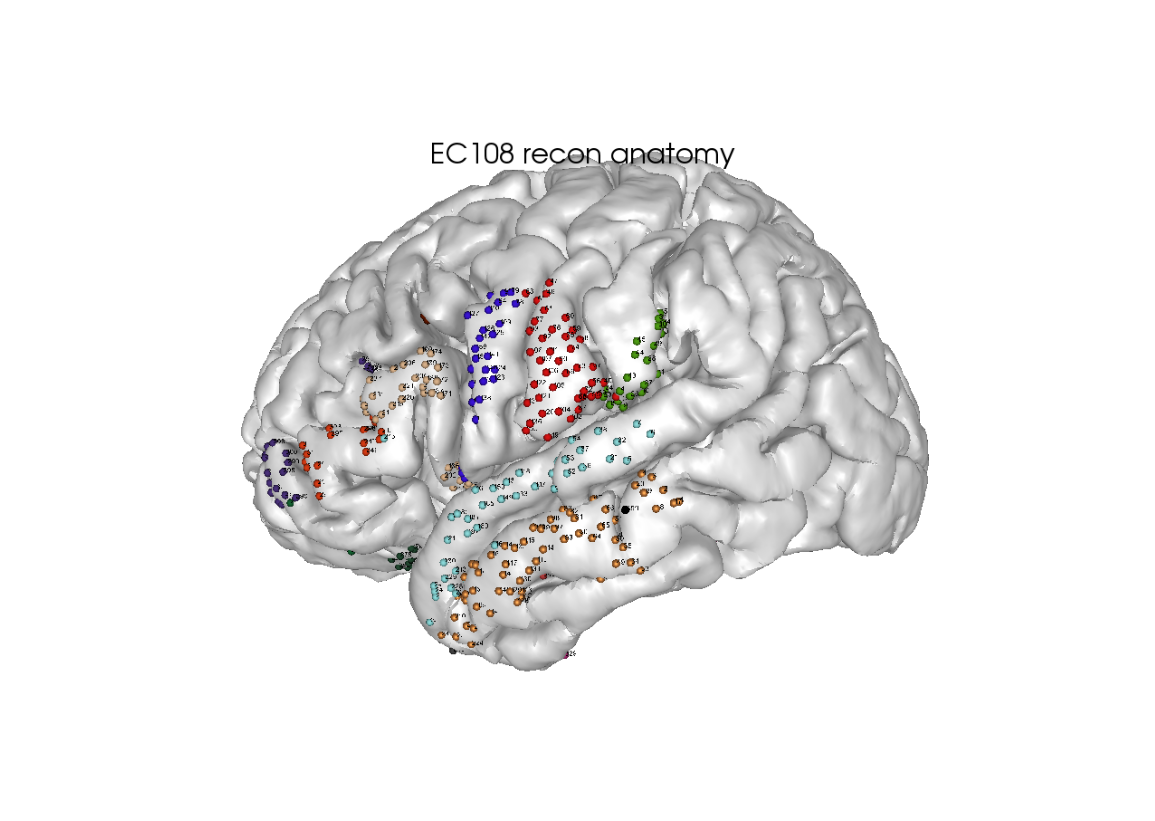

(<mayavi.modules.surface.Surface at 0x13521e8f0>,
 <module 'mayavi.mlab' from '/Users/dlchang/anaconda2/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

In [7]:
patient.plot_recon_anatomy(elecfile_prefix='TDT_elecs_all_warped',
                           template='cvs_avg35_inMNI152',
                           interactive=False,
                           screenshot=True)

Plot brain (gaussian, wiremesh, with elecs and weights)

In [4]:
# Plot left hem pial surface and left hippocampus, with gaussian weights on the
# hippocampus for electrodes in hippocampus

# FIX THE COLORBAR
import numpy as np
rois = [patient.roi('lh_pial',opacity=0.5,representation='wireframe',color=(0.9,0.9,0.5),gaussian=False),\
        patient.roi('lHipp',opacity=1.0,representation='surface',color=(0.5,0.3,0.5),gaussian=True)]
patient.plot_brain(rois=rois,elecs = patient.get_elecs(roi='Left-Hippocampus')['elecmatrix'],\
                   weights=np.random.uniform(0,1,(patient.get_elecs(roi='Left-Hippocampus')['elecmatrix'].shape[0],)),\
                   cmap='plasma')

(<mayavi.modules.surface.Surface at 0x11d4764d0>,
 None,
 <module 'mayavi.mlab' from '/Users/liberty/anaconda/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

In [5]:
# Right now we can't use custom colormaps, look up whether we can get vertex colors and
# set individually
from matplotlib import cm

cmap=cm.plasma

cmap2=cmap.colors
cmap2[0] = [0.5, 0.5, 0.5]

import matplotlib.colors
cmap3=matplotlib.colors.ListedColormap(cmap2)

mesh, points, mlab = patient.plot_brain(rois=rois,elecs = patient.get_elecs(roi='Left-Hippocampus')['elecmatrix'],\
                   weights=np.random.uniform(0,1,(patient.get_elecs(roi='Left-Hippocampus')['elecmatrix'].shape[0],)),\
                   cmap='plasma')

In [12]:
from img_pipe.plotting.ctmr_brain_plot import el_add 

subjs = ['EC108','EC125','EC84','EC82','EC81','EC87']

template = 'cvs_avg35_inMNI152'
atlas_patient = img_pipe.freeCoG(subj = template, hem='lh',\
                                 subj_dir = '/Users/liberty/dura_mount/data_store2/imaging/subjects')

roi = atlas_patient.roi('pial', opacity=0.5)
atlas_patient.plot_brain(rois = [roi], showfig=False)

elecs = []
for s in subjs:
    print s
    patient = img_pipe.freeCoG(subj = s, hem = 'stereo',\
                               subj_dir = '/Users/liberty/dura_mount/data_store2/imaging/subjects')
    elecs.append(patient.get_elecs(elecfile_prefix='TDT_elecs_all_warped')['elecmatrix'])

elecmatrix = np.concatenate(elecs, axis=0)
el_add(elecmatrix)
    

EC108
EC125
EC84
EC82
EC81
EC87


(<mayavi.modules.glyph.Glyph at 0x144f20b90>,
 <module 'mayavi.mlab' from '/Users/liberty/anaconda/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

In [13]:
mlab.show()

In [17]:
roi.gaussian=True
roi.opacity = 1.0
atlas_patient.plot_brain(rois=[roi], elecs=elecmatrix, weights=(np.ones((elecmatrix.shape[0],))))

TraitError: The 'result' trait of an UI instance must be a boolean, but a value of <PyQt4.QtCore.QObject object at 0x15d2c7e90> <class 'PyQt4.QtCore.QObject'> was specified.

TraitError: The 'result' trait of an UI instance must be a boolean, but a value of <PyQt4.QtCore.QObject object at 0x144f2c218> <class 'PyQt4.QtCore.QObject'> was specified.

TraitError: The 'result' trait of an UI instance must be a boolean, but a value of <PyQt4.QtCore.QObject object at 0x1365cc0e8> <class 'PyQt4.QtCore.QObject'> was specified.

(<mayavi.modules.surface.Surface at 0x132c2d110>,
 None,
 <module 'mayavi.mlab' from '/Users/liberty/anaconda/lib/python2.7/site-packages/mayavi/mlab.pyc'>)

# Plot ERPs

In [ ]:
#plotting ERPs on brain
patient=img_pipe.freeCoG('EC143','lh')
erp = np.load('/Users/dlchang/Desktop/ERPMatrix.npy')
patient.plot_erps(erp,0.05,3.0)
mlab.show()

In [3]:
#try out the notebook integration
pial, hipp = patient.roi('pial',(0.6,0.3,0.6),1.0,'wireframe',False), patient.roi('lHipp',(0.5,0.1,0.8),1.0,'wireframe',False)
elecs = patient.get_elecs(roi='superiortemporal')['elecmatrix']
#mlab.init_notebook(width=500, height=500)
mesh,points,mlab=patient.plot_brain(rois=[pial,hipp],elecs=elecs,weights=np.random.uniform(0,1,(elecs.shape[0])),showfig=True)
#mesh

In [21]:
mesh, points, mlab = patient.plot_brain(showfig=False)

In [22]:
mesh.actor.property.ambient_color = (1.0, 0.0, 0.0)